<a href="https://colab.research.google.com/github/mobinym/Exercises/blob/main/Polynomial_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/kc_house_data.csv/kc_house_data.csv')
df.shape
df.columns
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# df.drop(labels='id',axis=1 , inplace=True)
df.head()
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='waterfront', ylabel='price'>

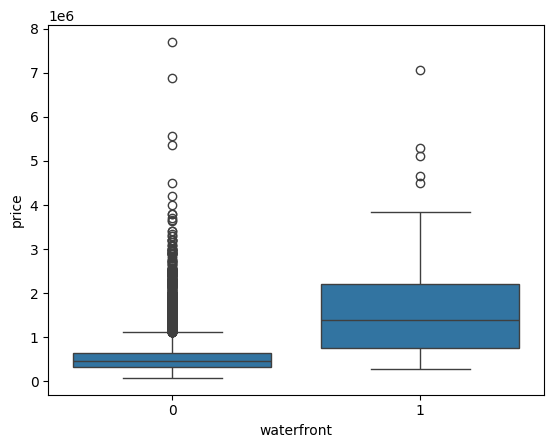

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

<Axes: xlabel='floors', ylabel='price'>

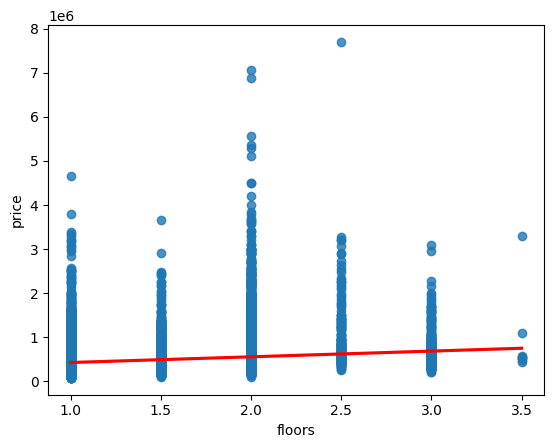

In [ ]:
sns.regplot(data=df,x='floors',y='price',line_kws={'color':'r'})

<Axes: xlabel='sqft_above', ylabel='price'>

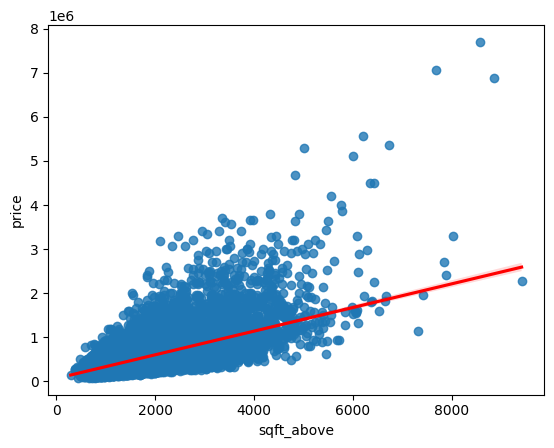

In [ ]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})

<Axes: >

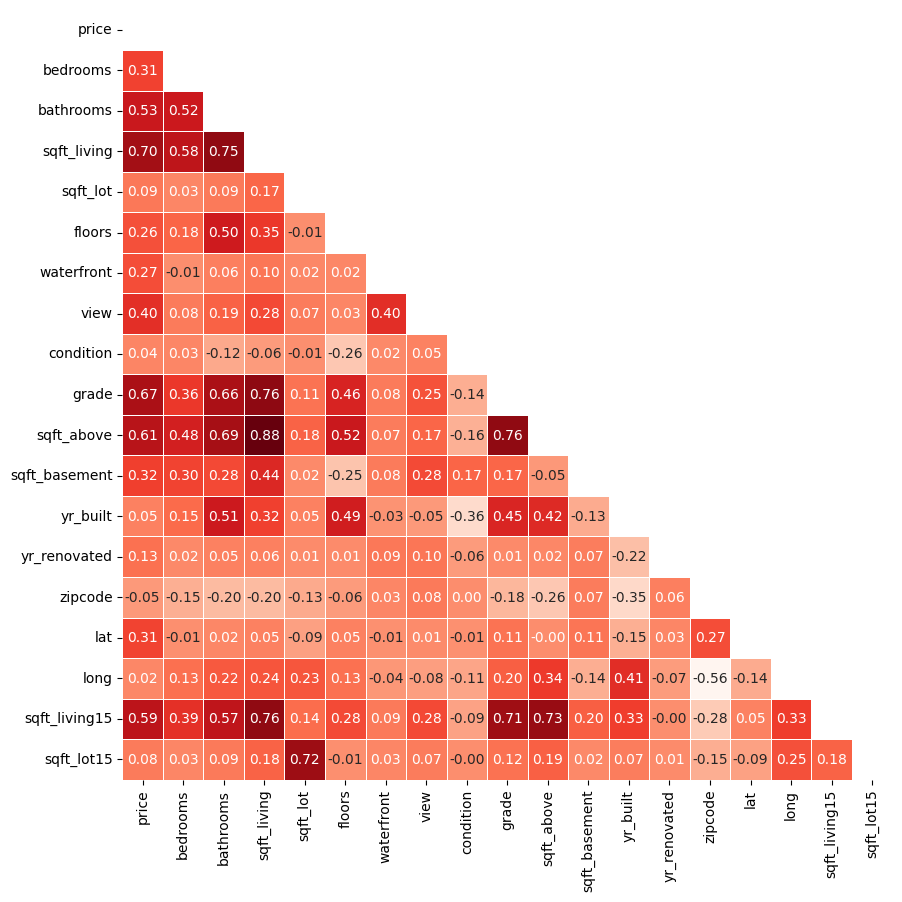

In [ ]:
mask = np.triu(df.corr(numeric_only=True))
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),mask=mask,annot=True,annot_kws={'size':10},fmt=".2f",linewidth=.5,cmap="Reds",square= True,cbar=False)

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# **SLR**

In [ ]:
X = df[['sqft_living']]
y = df[['price']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)


model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse)
print(r2)


model.score(X,y)

[-39551.58510563]
[[278.09528119]]
77810074770.96649
0.49016883616018136


0.4928019974112745

# **MLR**

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

X = df[features]
y = df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)


model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse)
print(r2)


model.score(X,y)

6079345.239220222
[-3.41937971e+04  4.29507476e+04  1.08142869e+02  9.86442108e-02
  6.37664979e+03  5.68609215e+05  5.44627979e+04  2.46042235e+04
  9.46491212e+04  7.02452412e+01  3.78976282e+01 -2.65571843e+03
  1.94412444e+01 -5.53028915e+02  6.01670832e+05 -1.97235750e+05
  2.14863216e+01 -3.55817414e-01]
47486548603.56576
0.6888562000158154


0.699629614911699

**Polynomial** **regression**

In [ ]:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
y = df['price']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model = LinearRegression()
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

model.fit(X_train_poly,y_train)


y_pred = model.predict(X_test_poly)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

model.score(X_test_poly, y_test)

39657899423.389626
0.7401514768108985


0.7401514768108985

# **Pipeline**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

pipeline = Pipeline(
    [
        ('scaler' , StandardScaler()),
        ('pca' , PCA(n_components=3)),
        ('regressor' , LinearRegression())
    ]
)

pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

sklearn.preprocessing._data.StandardScaler